In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import floor
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE, roc_auc_score as AUC_score
from sklearn import preprocessing

from regression_problem import Regression
from neural_network import NeuralNetwork

mpl.rcdefaults()
plt.style.use('seaborn-darkgrid')
mpl.rcParams['figure.figsize'] = [10.0, 4.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18


parameter_names = ["Happiness", "Economy", "Family", "Health", "Freedom", "Trust", "Generosity"]
data_df = pd.read_pickle("../data/world_happiness.pickle")[parameter_names]
data = data_df.to_numpy()
output = data[:,0].reshape(-1,1)
input_data = data[:,1:]

hidden_neuron_list = [100]
epochs = 700
runs = 40
r2_test_runs = np.zeros((runs,epochs))
r2_train_runs = np.zeros((runs,epochs))
r2_end_test = np.zeros(runs)
r2_end_train = np.zeros(runs)
reg = Regression(hidden_activation='RELU')

etas = np.logspace(-4,-3,2)
lmbds = np.logspace(-7,1,8)
many_nns = np.zeros((len(etas),len(lmbds),runs),dtype=object)

for run in range(runs):
    print('run',run)
    for i,eta in tqdm(enumerate(etas)):
        for j,lmbd in enumerate(lmbds):
            X_train, X_test, Y_train, Y_test = train_test_split(input_data, output,test_size=0.2)
            Scaler = preprocessing.StandardScaler()
            X_train_scaled = Scaler.fit_transform(X_train)
            X_test_scaled = Scaler.transform(X_test)
            nn = NeuralNetwork( X_train_scaled,
                                Y_train,
                                problem=reg,
                                n_hidden_neurons_list=hidden_neuron_list,
                                n_output_neurons=1,
                                epochs=epochs,
                                batch_size=32,
                                eta=eta,
                                lmbd=lmbd,
                                debug=False)
            nn.SGD(track=['r2'],test_data=(X_test_scaled,Y_test),train_data=(X_train_scaled,Y_train),one_hot_encoding=False)
            many_nns[i,j,run] = nn

            r2_end_test[run] = nn.r2_test[-1]
            r2_end_train[run] = nn.r2_train[-1]





0it [00:00, ?it/s]

run 0






1it [00:26, 26.44s/it]



2it [00:55, 27.13s/it]



0it [00:00, ?it/s]

run 1






1it [00:29, 29.90s/it]



2it [00:59, 29.92s/it]



0it [00:00, ?it/s]

run 2






1it [00:31, 31.87s/it]



2it [01:01, 31.13s/it]



0it [00:00, ?it/s]

run 3






1it [00:30, 30.73s/it]



2it [01:01, 30.66s/it]



0it [00:00, ?it/s]

run 4






1it [00:32, 32.03s/it]



2it [01:05, 32.59s/it]



0it [00:00, ?it/s]

run 5






1it [00:32, 32.09s/it]



2it [01:01, 31.30s/it]



0it [00:00, ?it/s]

run 6






1it [00:29, 29.15s/it]



2it [00:59, 29.39s/it]



0it [00:00, ?it/s]

run 7






1it [00:29, 29.76s/it]



2it [00:59, 29.76s/it]



0it [00:00, ?it/s]

run 8






1it [00:30, 30.22s/it]



2it [01:00, 30.27s/it]



0it [00:00, ?it/s]

run 9






1it [00:32, 32.92s/it]



2it [01:04, 32.59s/it]



0it [00:00, ?it/s]

run 10






1it [00:30, 30.88s/it]



2it [01:01, 30.71s/it]



0it [00:00, ?it/s]

run 11






1it [00:29, 29.79s/it]



2it [00:59, 29.89s/it]



0it [00:00, ?it/s]

run 12






1it [00:30, 30.18s/it]



2it [01:00, 30.24s/it]



0it [00:00, ?it/s]

run 13






1it [00:29, 29.97s/it]



2it [00:59, 29.92s/it]



0it [00:00, ?it/s]

run 14






1it [00:30, 30.36s/it]



2it [01:03, 31.27s/it]



0it [00:00, ?it/s]

run 15






1it [00:33, 33.98s/it]



2it [01:03, 32.73s/it]



0it [00:00, ?it/s]

run 16






1it [00:29, 29.69s/it]



2it [01:00, 30.02s/it]



0it [00:00, ?it/s]

run 17






1it [00:30, 30.21s/it]



2it [01:00, 30.24s/it]



0it [00:00, ?it/s]

run 18






1it [00:28, 28.58s/it]



2it [00:58, 28.85s/it]



0it [00:00, ?it/s]

run 19






1it [00:32, 32.17s/it]



2it [01:05, 32.61s/it]



0it [00:00, ?it/s]

run 20






1it [00:30, 30.56s/it]



2it [01:00, 30.27s/it]



0it [00:00, ?it/s]

run 21






1it [00:29, 29.63s/it]



2it [00:59, 29.62s/it]



0it [00:00, ?it/s]

run 22






1it [00:29, 29.45s/it]



2it [00:59, 29.71s/it]



0it [00:00, ?it/s]

run 23






1it [00:28, 28.05s/it]



2it [00:59, 28.93s/it]



0it [00:00, ?it/s]

run 24






1it [00:33, 33.83s/it]



2it [01:05, 33.15s/it]



0it [00:00, ?it/s]

run 25






1it [00:29, 29.41s/it]



2it [00:58, 29.31s/it]



0it [00:00, ?it/s]

run 26






1it [00:29, 29.49s/it]



2it [00:58, 29.41s/it]



0it [00:00, ?it/s]

run 27






1it [00:29, 29.29s/it]



2it [00:59, 29.50s/it]



0it [00:00, ?it/s]

run 28






1it [00:28, 28.48s/it]



2it [01:00, 29.68s/it]



0it [00:00, ?it/s]

run 29






1it [00:33, 33.40s/it]



2it [01:02, 32.19s/it]



0it [00:00, ?it/s]

run 30






1it [00:29, 29.46s/it]



2it [00:58, 29.34s/it]



0it [00:00, ?it/s]

run 31






1it [00:29, 29.31s/it]



2it [00:58, 29.41s/it]



0it [00:00, ?it/s]

run 32






1it [00:30, 30.07s/it]



2it [01:00, 30.17s/it]



0it [00:00, ?it/s]

run 33






1it [00:29, 29.03s/it]



2it [00:58, 29.06s/it]



0it [00:00, ?it/s]

run 34






1it [00:30, 30.82s/it]



2it [01:03, 31.49s/it]



0it [00:00, ?it/s]

run 35






1it [00:31, 31.90s/it]



2it [01:01, 31.15s/it]



0it [00:00, ?it/s]

run 36






1it [00:29, 29.37s/it]



2it [00:57, 28.96s/it]



0it [00:00, ?it/s]

run 37






1it [00:29, 29.63s/it]



2it [00:59, 29.74s/it]



0it [00:00, ?it/s]

run 38






1it [00:29, 29.67s/it]



2it [00:59, 29.60s/it]



0it [00:00, ?it/s]

run 39






1it [00:33, 33.42s/it]



2it [01:05, 33.16s/it]

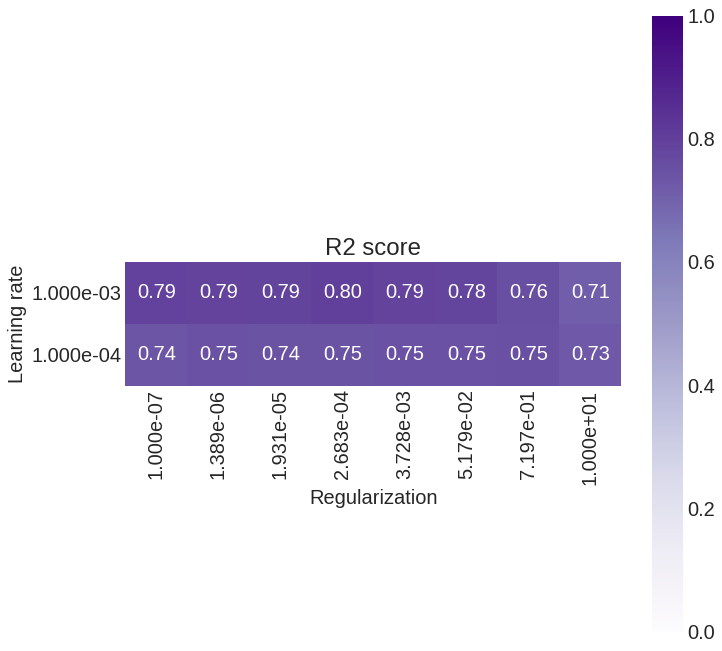

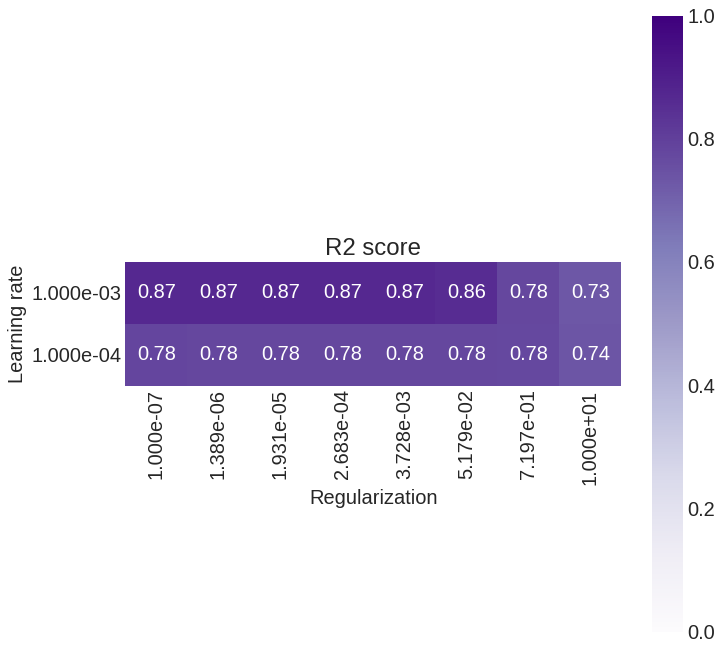

In [49]:
r2_end_test = np.zeros((len(etas),len(lmbds)))
r2_end_train = np.zeros_like(r2_end_test)
for i,eta in enumerate(etas):
    for j,lmbd in enumerate(lmbds):
        nn_runs = many_nns[i,j,:]
        test = 0
        train = 0
        for k in range(len(nn_runs)):
            test += nn_runs[k].r2_test[-1]
            train += nn_runs[k].r2_train[-1]
        test /= len(nn_runs)
        train /= len(nn_runs)

        r2_end_test[i,j] = test
        r2_end_train[i,j] = train

import seaborn as sns
etas_ticks = ['{:.3e}'.format(x) for x in etas]
lmbds_ticks = ['{:.3e}'.format(x) for x in lmbds]
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(r2_end_test,annot=True,fmt='.2f',vmin=0,vmax=1,ax=ax,square=True,xticklabels=lmbds_ticks,yticklabels=etas_ticks,cmap='Purples')
ax.set_title('R2 score')
ax.set_ylabel('Learning rate')
ax.set_xlabel('Regularization')
plt.ylim(0,len(etas))
plt.xlim(0,len(lmbds))
fig.savefig('../figs/WH_self_heatmap_test2.pdf',bbox_inches='tight') # Run with [100,100], 700 epochs, batch size 32 and 15 runs

fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(r2_end_train,annot=True,fmt='.2f',vmin=0,vmax=1,ax=ax,square=True,xticklabels=lmbds_ticks,yticklabels=etas_ticks,cmap='Purples')
ax.set_title('R2 score')
ax.set_ylabel('Learning rate')
ax.set_xlabel('Regularization')
plt.ylim(0,len(etas))
plt.xlim(0,len(lmbds))
fig.savefig('../figs/WH_self_heatmap_train2.pdf',bbox_inches='tight'); # Run with [100,100], 700 epochs, batch size 32 and 15 runs